<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Perceptron and Gradient Descent**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

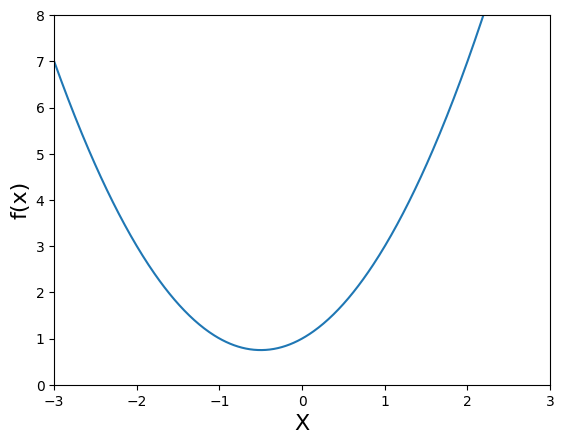

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

Slope & Derivatives

In [5]:
def df(x):
    return 2 * x + 1

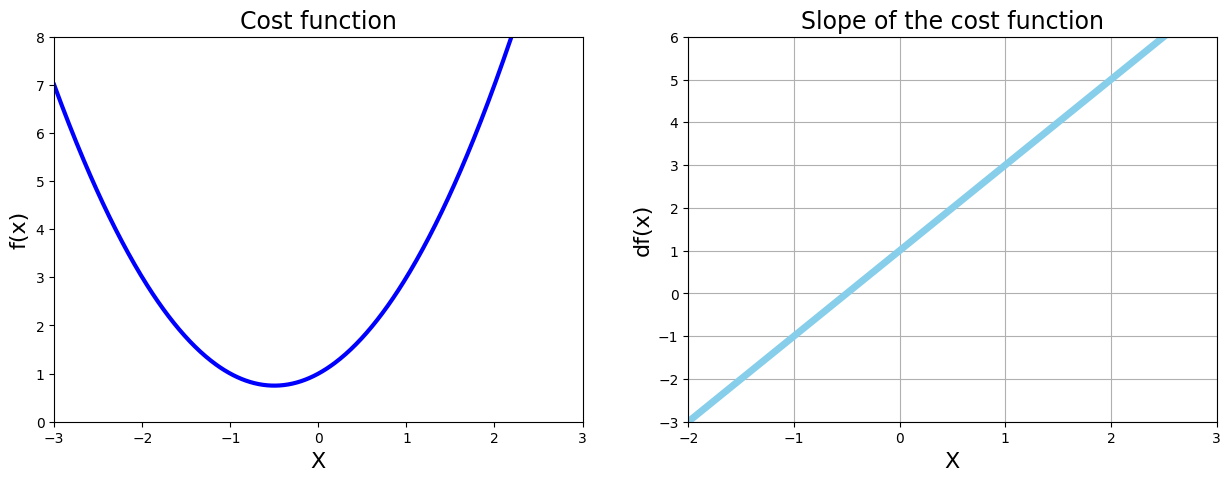

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

Task 1

In [7]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED] Calculate the gradient at the current position
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update x using gradient descent rule

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED] Append the slope of the new point to the list

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


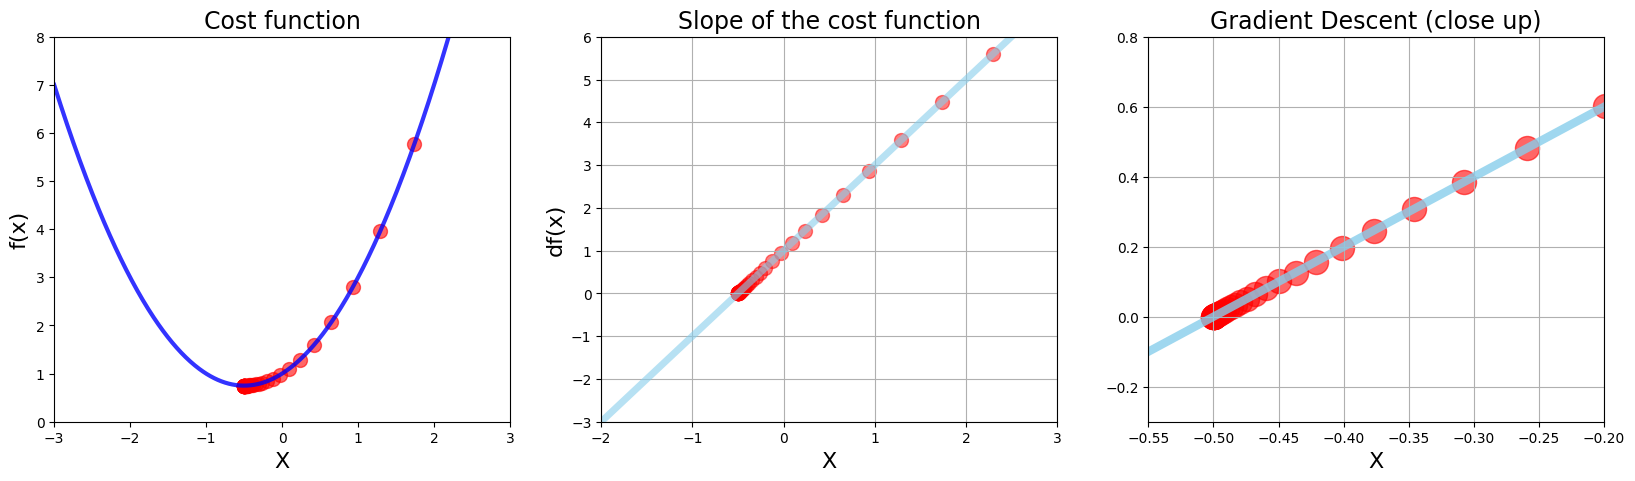

In [8]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

Task 2

In [9]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5  # [REQUIRED] Function as given

def dg(x):
    return 4*x**3 - 8*x  # [REQUIRED] Derivative of g(x)


Task 3

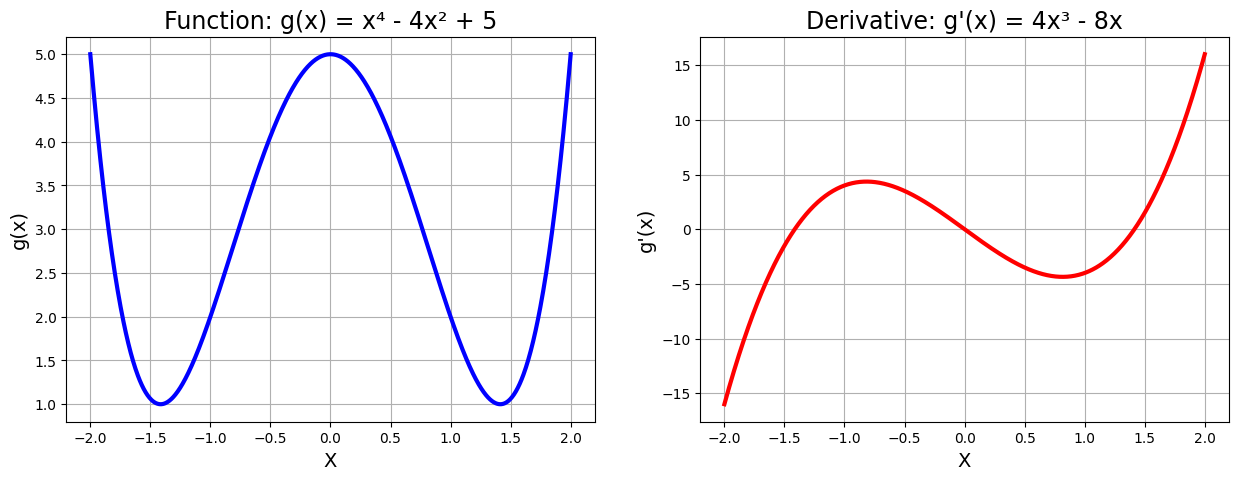

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5  # Function

def dg(x):
    return 4*x**3 - 8*x  # Derivative of the function

# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: g(x)
plt.subplot(1, 2, 1)
plt.title('Function: g(x) = x⁴ - 4x² + 5', fontsize=17)
plt.xlabel('X', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.grid()

# 2 Chart: Derivative g'(x)
plt.subplot(1, 2, 2)
plt.title("Derivative: g'(x) = 4x³ - 8x", fontsize=17)
plt.xlabel('X', fontsize=14)
plt.ylabel("g'(x)", fontsize=14)
plt.plot(x_2, dg(x_2), color='red', linewidth=3)
plt.grid()

# Show plots
plt.show()


**Gradient Descent**

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


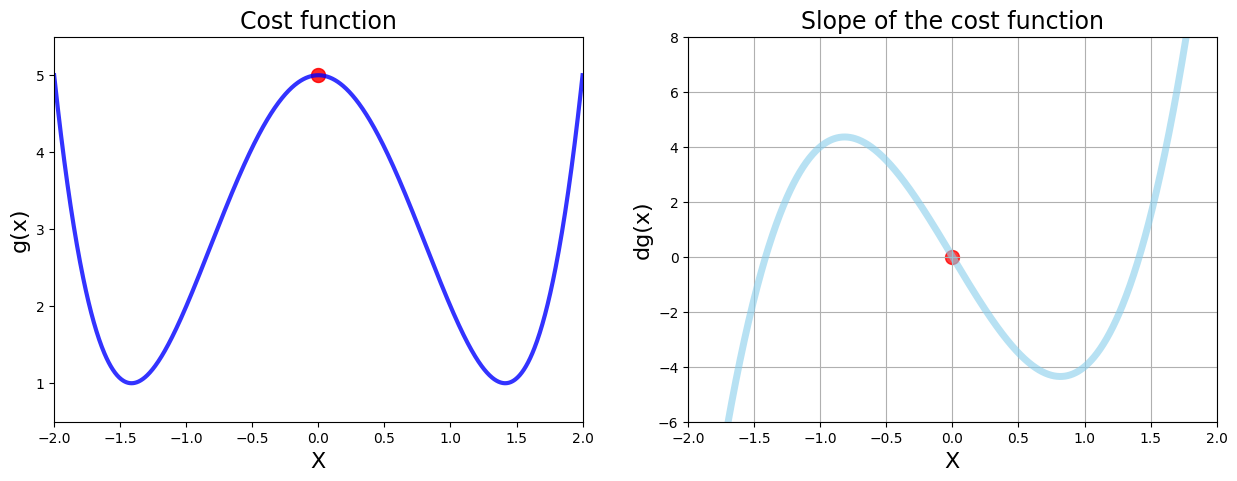

In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

Task 4

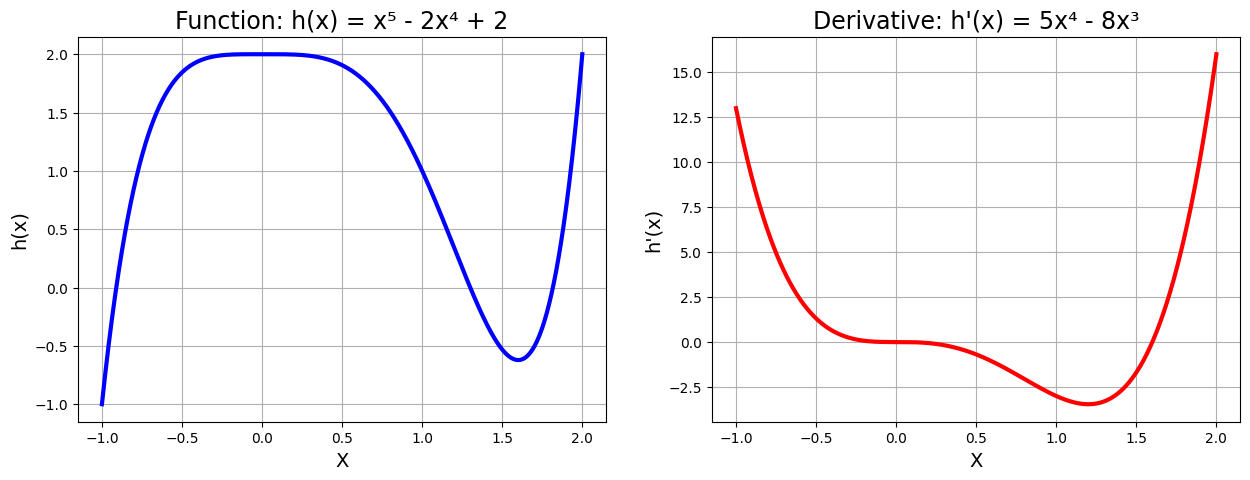

Gradient Descent converged after 75 iterations.
Local minimum occurs at: 1.5996556725226643
Slope at this point: -0.007047274957336924
Function value at this point: -0.6214387864536057


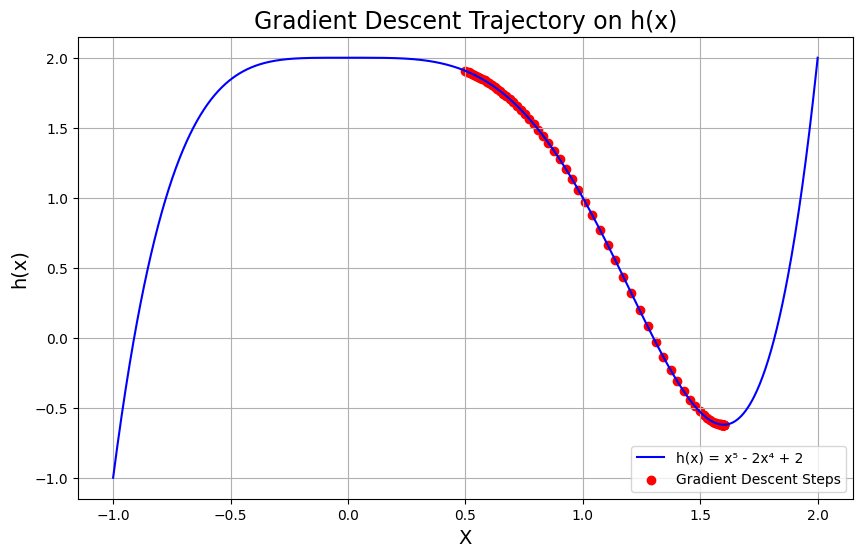

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x) and its derivative h'(x)
def h(x):
    return x**5 - 2*x**4 + 2  # Function

def dh(x):
    return 5*x**4 - 8*x**3  # Derivative of the function

# 1. Plot h(x) and its derivative side by side
x_3 = np.linspace(-1, 2, 1000)  # Domain for the function

plt.figure(figsize=[15, 5])

# Plot h(x)
plt.subplot(1, 2, 1)
plt.title('Function: h(x) = x⁵ - 2x⁴ + 2', fontsize=17)
plt.xlabel('X', fontsize=14)
plt.ylabel('h(x)', fontsize=14)
plt.plot(x_3, h(x_3), color='blue', linewidth=3)
plt.grid()

# Plot h'(x)
plt.subplot(1, 2, 2)
plt.title("Derivative: h'(x) = 5x⁴ - 8x³", fontsize=17)
plt.xlabel('X', fontsize=14)
plt.ylabel("h'(x)", fontsize=14)
plt.plot(x_3, dh(x_3), color='red', linewidth=3)
plt.grid()

plt.show()

# 2. Gradient Descent Implementation
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=500):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)  # Compute the gradient
        new_x = previous_x - multiplier * gradient  # Update x

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            print(f"Gradient Descent converged after {n} iterations.")
            break
    return new_x, x_list, slope_list

# Run gradient descent for h'(x)
initial_guess = 0.5  # Starting point
learning_rate = 0.01
precision = 0.0001

local_min, x_values, slopes = gradient_descent(dh, initial_guess, multiplier=learning_rate, precision=precision)

# 3. Print Results
print("Local minimum occurs at:", local_min)
print("Slope at this point:", dh(local_min))
print("Function value at this point:", h(local_min))

# 4. Visualize Gradient Descent Steps
plt.figure(figsize=(10, 6))
plt.plot(x_3, h(x_3), color='blue', label='h(x) = x⁵ - 2x⁴ + 2')
plt.scatter(x_values, [h(x) for x in x_values], color='red', label='Gradient Descent Steps')
plt.title("Gradient Descent Trajectory on h(x)", fontsize=17)
plt.xlabel('X', fontsize=14)
plt.ylabel('h(x)', fontsize=14)
plt.grid()
plt.legend()
plt.show()


Gradient Descent converged after 18 iterations.


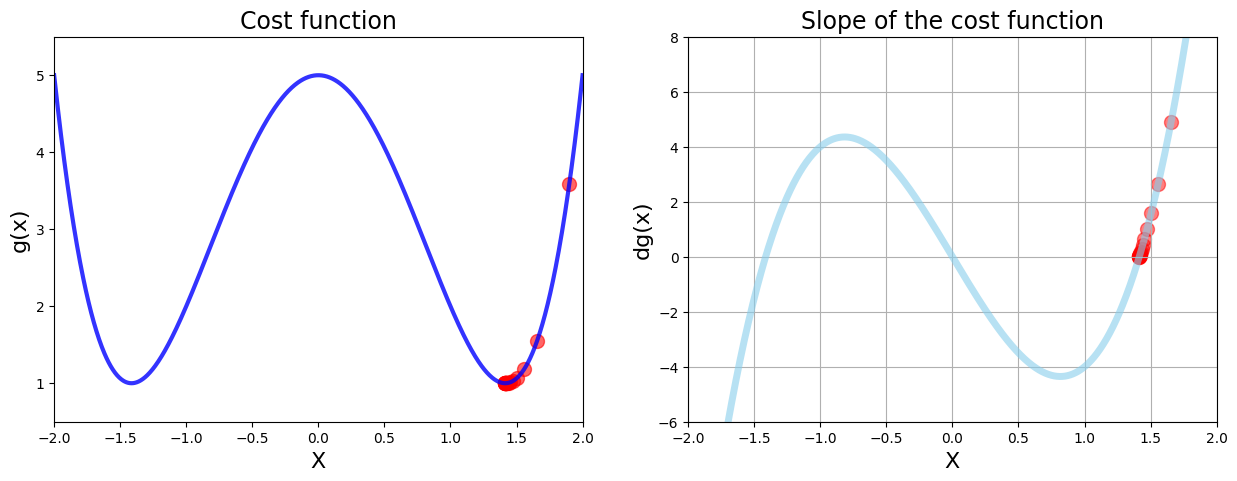

Number of steps is:  20


In [20]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

Task 5 and 6

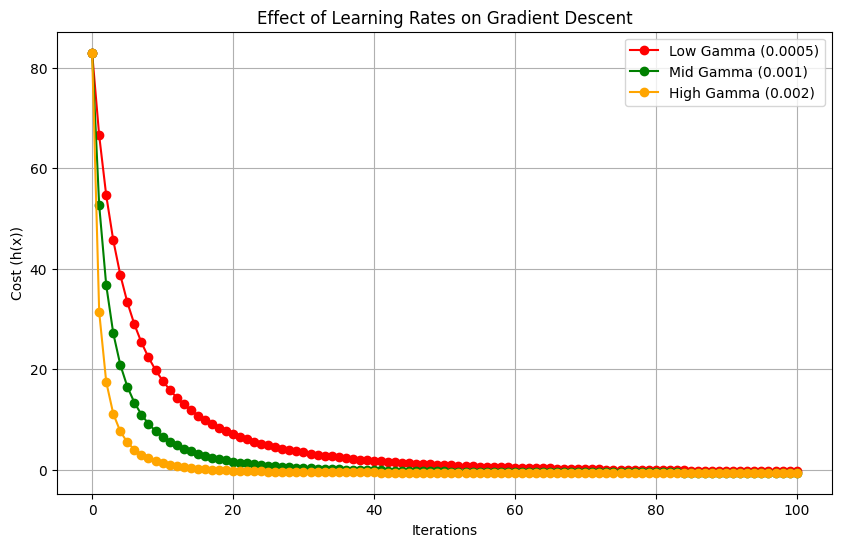

In [30]:
# Run gradient descent 3 times with different learning rates
n = 100  # Maximum iterations

# Low learning rate
low_gamma = gradient_descent(derivative_func=dh, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

# Mid learning rate
mid_gamma = gradient_descent(derivative_func=dh, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

# High learning rate
high_gamma = gradient_descent(derivative_func=dh, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Function for plotting gradient descent paths
def plot_gradient_descent_results(results, labels, color_list):
    plt.figure(figsize=(10, 6))
    for result, label, color in zip(results, labels, color_list):
        x_values = result[1]  # x-values visited during gradient descent
        y_values = [h(x) for x in x_values]  # Corresponding function values
        plt.plot(range(len(y_values)), y_values, color=color, marker='o', linestyle='-', label=label)

    plt.title("Effect of Learning Rates on Gradient Descent")
    plt.xlabel("Iterations")
    plt.ylabel("Cost (h(x))")
    plt.grid()
    plt.legend()
    plt.show()

# Plot results
plot_gradient_descent_results(
    results=[low_gamma, mid_gamma, high_gamma],
    labels=["Low Gamma (0.0005)", "Mid Gamma (0.001)", "High Gamma (0.002)"],
    color_list=["red", "green", "orange"]
)


Task 6

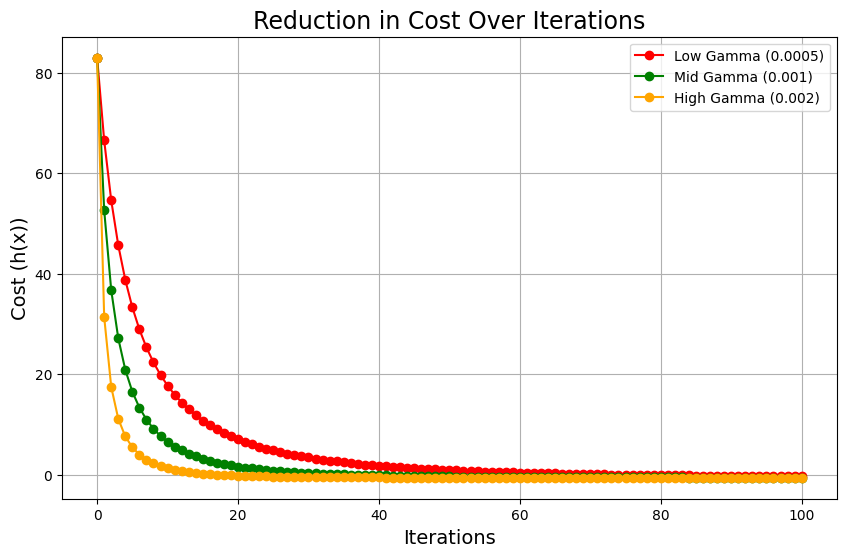

In [31]:
# Function to plot cost reduction over iterations
def plot_cost_reduction(results, labels, color_list):
    plt.figure(figsize=(10, 6))
    for result, label, color in zip(results, labels, color_list):
        x_values = result[1]  # List of x-values at each iteration
        cost_values = [h(x) for x in x_values]  # Corresponding cost values (h(x))
        plt.plot(range(len(cost_values)), cost_values, color=color, marker='o', linestyle='-', label=label)

    plt.title("Reduction in Cost Over Iterations", fontsize=17)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Cost (h(x))", fontsize=14)
    plt.grid()
    plt.legend()
    plt.show()

# Run gradient descent with different learning rates
n = 100  # Maximum iterations

# Low learning rate
low_gamma = gradient_descent(derivative_func=dh, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

# Mid learning rate
mid_gamma = gradient_descent(derivative_func=dh, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

# High learning rate
high_gamma = gradient_descent(derivative_func=dh, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Plot cost reduction
plot_cost_reduction(
    results=[low_gamma, mid_gamma, high_gamma],
    labels=["Low Gamma (0.0005)", "Mid Gamma (0.001)", "High Gamma (0.002)"],
    color_list=["red", "green", "orange"]
)


Task 8

Local minimum occurs at: x = 1.809038379511051 , y = 1.809038379511051
Minimum cost (f(x, y)) = 0.9992469915267698


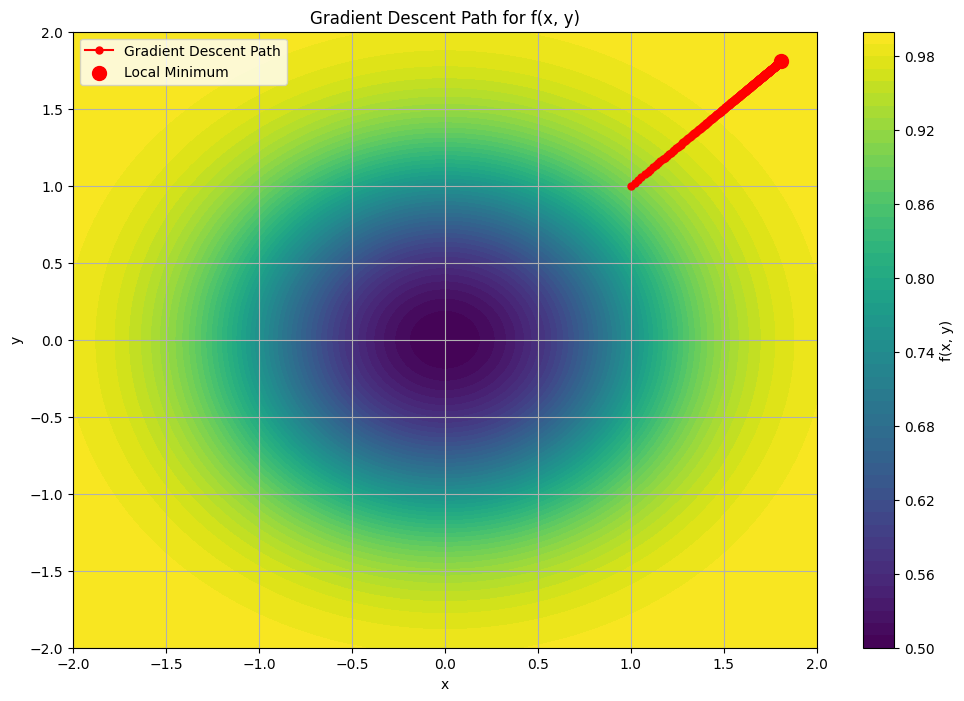

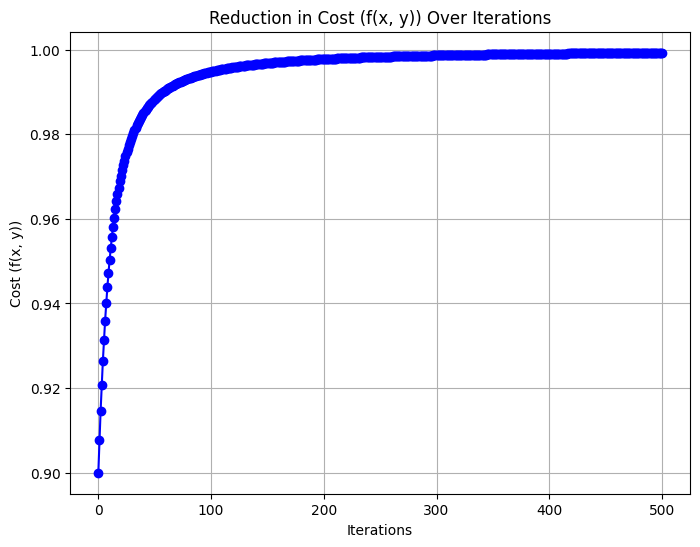

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y)
def f(x, y):
    return 1 / (3**(-x**2 - y**2) + 1)

# Compute the partial derivatives (gradient of f)
def df(x, y):
    r = 3**(-x**2 - y**2)  # Auxiliary variable r
    common_factor = r * np.log(3) / (3**(-x**2 - y**2) + 1)**2  # Common term in gradient
    df_dx = common_factor * (-2 * x)  # Partial derivative with respect to x
    df_dy = common_factor * (-2 * y)  # Partial derivative with respect to y
    return df_dx, df_dy

# Gradient Descent for multivariable function
def gradient_descent_2d(derivative_func, initial_guess, multiplier=0.1, precision=1e-6, max_iter=500):
    x, y = initial_guess
    x_list, y_list, cost_list = [x], [y], [f(x, y)]

    for i in range(max_iter):
        df_dx, df_dy = derivative_func(x, y)  # Compute the gradient
        x_new = x - multiplier * df_dx  # Update x
        y_new = y - multiplier * df_dy  # Update y

        step_size = np.sqrt((x_new - x)**2 + (y_new - y)**2)  # Magnitude of the step
        x, y = x_new, y_new

        x_list.append(x)
        y_list.append(y)
        cost_list.append(f(x, y))

        if step_size < precision:
            print(f"Converged after {i+1} iterations.")
            break

    return x, y, x_list, y_list, cost_list

# Initial settings
initial_guess = (1.0, 1.0)
learning_rate = 0.1
precision = 1e-6
max_iterations = 500

# Run Gradient Descent
final_x, final_y, x_list, y_list, cost_list = gradient_descent_2d(df, initial_guess,
                                                                  multiplier=learning_rate,
                                                                  precision=precision,
                                                                  max_iter=max_iterations)

# Print Results
print("Local minimum occurs at: x =", final_x, ", y =", final_y)
print("Minimum cost (f(x, y)) =", f(final_x, final_y))

# Visualization: Contour Plot and Gradient Descent Path
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

plt.figure(figsize=(12, 8))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.plot(x_list, y_list, 'r.-', markersize=10, linewidth=1.5, label='Gradient Descent Path')
plt.scatter(final_x, final_y, color='red', s=100, label='Local Minimum')
plt.title('Gradient Descent Path for f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Plot cost reduction
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_list)), cost_list, color='blue', marker='o', linestyle='-')
plt.title("Reduction in Cost (f(x, y)) Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (f(x, y))")
plt.grid()
plt.show()


In [33]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


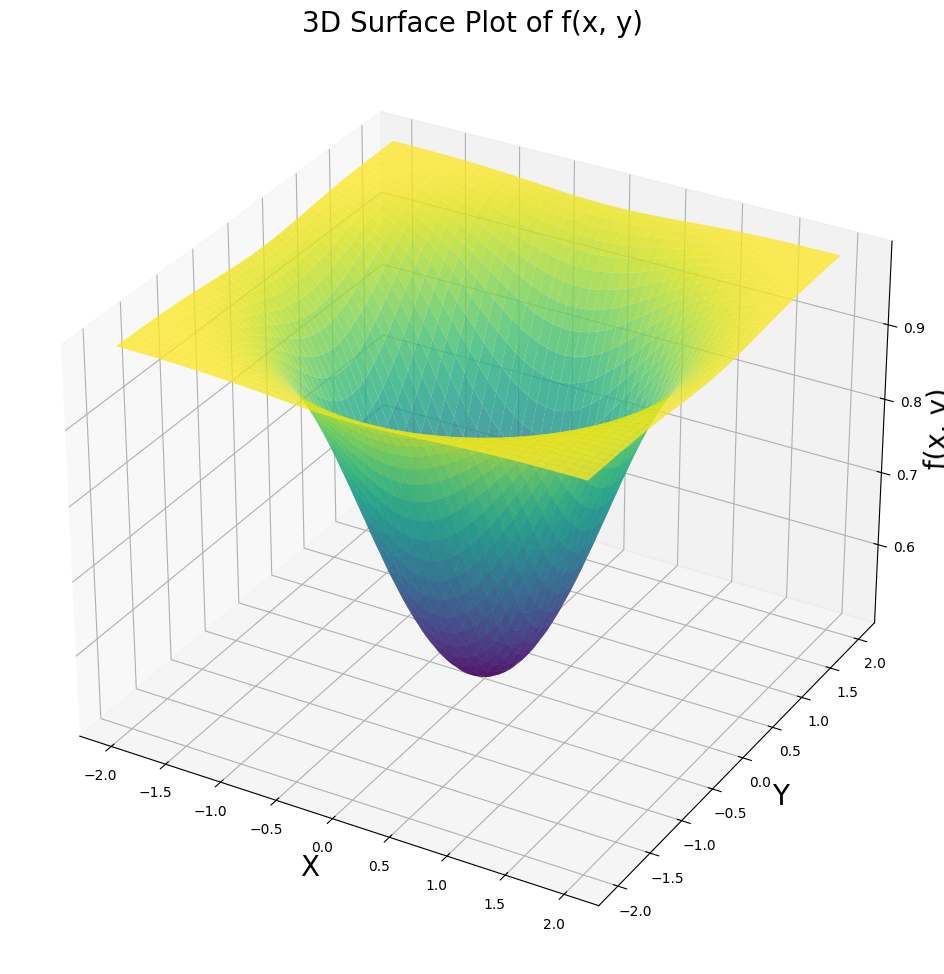

In [35]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot instead of gca

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y)', fontsize=20)
ax.set_title('3D Surface Plot of f(x, y)', fontsize=20)

# Create data
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)  # Function f(x, y) from earlier

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

plt.show()


Task 9

In [38]:
from sympy import symbols, diff, ln, evalf

# Define symbols
a, b = symbols('x y')

# Define the cost function f(x, y)
f = 1 / (3**(-a**2 - b**2) + 1)

# Partial derivatives
df_da = diff(f, a)  # Partial derivative wrt x
df_db = diff(f, b)  # Partial derivative wrt y

# Print Results
print("Our cost function f(x, y) is: ", f)
print("Partial derivative wrt x is: ", df_da)
print("Partial derivative wrt y is: ", df_db)

# Evaluate the function at x=1.8, y=1.0
value_f = f.evalf(subs={a: 1.8, b: 1.0})
print("Value of f(x, y) at x=1.8, y=1.0 is: ", value_f)

# Evaluate the partial derivatives at x=1.8, y=1.0
value_df_da = df_da.evalf(subs={a: 1.8, b: 1.0})
value_df_db = df_db.evalf(subs={a: 1.8, b: 1.0})

print("Value of partial derivative wrt x at x=1.8, y=1.0: ", value_df_da)
print("Value of partial derivative wrt y at x=1.8, y=1.0: ", value_df_db)


Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative wrt y is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8, y=1.0 is:  0.990604794032582
Value of partial derivative wrt x at x=1.8, y=1.0:  0.0368089716197505
Value of partial derivative wrt y at x=1.8, y=1.0:  0.0204494286776392


In [40]:
import numpy as np
from sympy import symbols, diff, ln

# Define symbols
a, b = symbols('x y')

# Define the cost function f(x, y)
f = 1 / (3**(-a**2 - b**2) + 1)

# Setup for gradient descent
multiplier = 0.1  # Learning rate
max_iter = 500    # Maximum number of iterations
params = np.array([1.8, 1.0])  # Initial guess

# Gradient descent loop
for n in range(max_iter):
    # Compute gradients wrt x and y
    gradient_x = diff(f, a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f, b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y], dtype=float)

    # Update parameters
    params = params - multiplier * gradients

# Final Results
cost = f.evalf(subs={a: params[0], b: params[1]})

print('Values in gradient array:', gradients)
print('Minimum occurs at x value of: {:.4f}'.format(params[0]))
print('Minimum occurs at y value of: {:.4f}'.format(params[1]))
print('The cost is: {:.6f}'.format(cost))


Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 0.0000
Minimum occurs at y value of: 0.0000
The cost is: 0.500000


Task 10

In [41]:
# Partial derivative functions
def fpx(x, y):
    r = 3**(-x**2 - y**2)  # Auxiliary variable
    return - (r * np.log(3) * (-2 * x)) / (r + 1)**2  # Partial derivative wrt x

def fpy(x, y):
    r = 3**(-x**2 - y**2)  # Auxiliary variable
    return - (r * np.log(3) * (-2 * y)) / (r + 1)**2  # Partial derivative wrt y


In [44]:
# Cost function
def cost_function(x, y):
    return 1 / (3**(-x**2 - y**2) + 1)

# Partial derivatives
def fpx(x, y):
    r = 3**(-x**2 - y**2)  # Auxiliary variable
    return - (r * np.log(3) * (-2 * x)) / (r + 1)**2  # Partial derivative wrt x

def fpy(x, y):
    r = 3**(-x**2 - y**2)  # Auxiliary variable
    return - (r * np.log(3) * (-2 * y)) / (r + 1)**2  # Partial derivative wrt y

# Gradient Descent Setup
multiplier = 0.1  # Learning rate
max_iter = 500    # Maximum number of iterations
params = np.array([1.8, 1.0])  # Initial guess

# Gradient Descent Loop
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])  # Partial derivative wrt x
    gradient_y = fpy(params[0], params[1])  # Partial derivative wrt y
    gradients = np.array([gradient_x, gradient_y])  # Gradient vector
    params = params - multiplier * gradients  # Update parameters

# Results
final_cost = cost_function(params[0], params[1])

print('Values in gradient array:', gradients)
print('Minimum occurs at x value of: {:.4f}'.format(params[0]))
print('Minimum occurs at y value of: {:.4f}'.format(params[1]))
print('The cost is: {:.6f}'.format(final_cost))


Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 0.0000
Minimum occurs at y value of: 0.0000
The cost is: 0.500000


In [46]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  # Initial guess
values_array = params.reshape(1, 2)  # Initialize storage for parameter history
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])  # Partial derivative wrt x
    gradient_y = fpy(params[0], params[1])  # Partial derivative wrt y
    gradients = np.array([gradient_x, gradient_y])  # Gradient vector
    params = params - multiplier * gradients  # Update parameters

    # Append new parameter values to the array
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

# Results
final_cost = 1 / (3**(-params[0]**2 - params[1]**2) + 1)  # Evaluate numerical cost function

print('Values in gradient array:', gradients)
print('Minimum occurs at x value of: {:.4f}'.format(params[0]))
print('Minimum occurs at y value of: {:.4f}'.format(params[1]))
print('The cost is: {:.6f}'.format(final_cost))


(1, 2)
Values in gradient array: [0.00046144 0.00025636]
Minimum occurs at x value of: 0.0008
Minimum occurs at y value of: 0.0004
The cost is: 0.500000


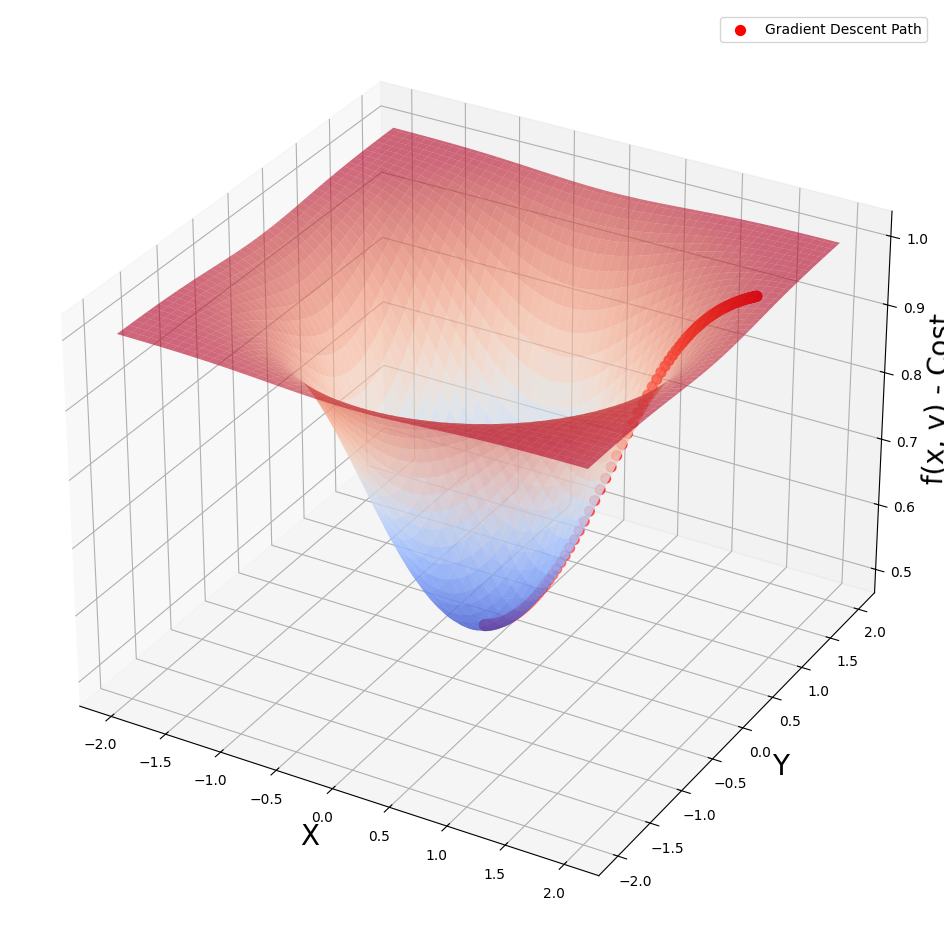

In [48]:
# Generate meshgrid for 3D surface plot
x_4 = np.linspace(-2, 2, 100)
y_4 = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_4, y_4)
Z = cost_function(X, Y)  # Numerical evaluation of f(x, y)

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')  # Replace gca with add_subplot

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot surface
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6)

# Plot gradient descent path
z_values = cost_function(values_array[:, 0], values_array[:, 1])  # Evaluate cost for all points
ax.scatter(values_array[:, 0], values_array[:, 1], z_values, s=50, color='red', label='Gradient Descent Path')

plt.legend()
plt.show()


In [49]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)


Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [50]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


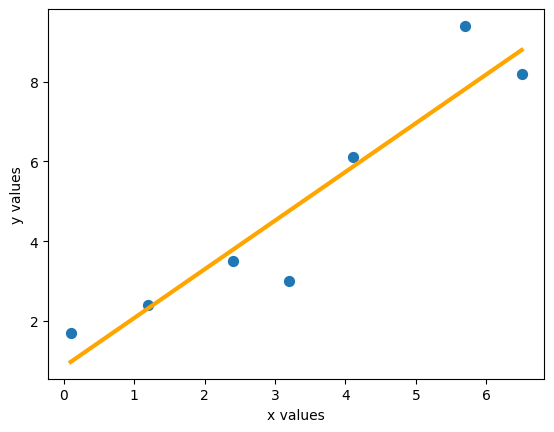

In [51]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [52]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [53]:
import numpy as np

def mse(y, y_hat):
    """
    Compute the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    y (numpy array): Actual values
    y_hat (numpy array): Predicted values

    Returns:
    float: Mean Squared Error
    """
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc


In [54]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


In [55]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


In [56]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-56-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


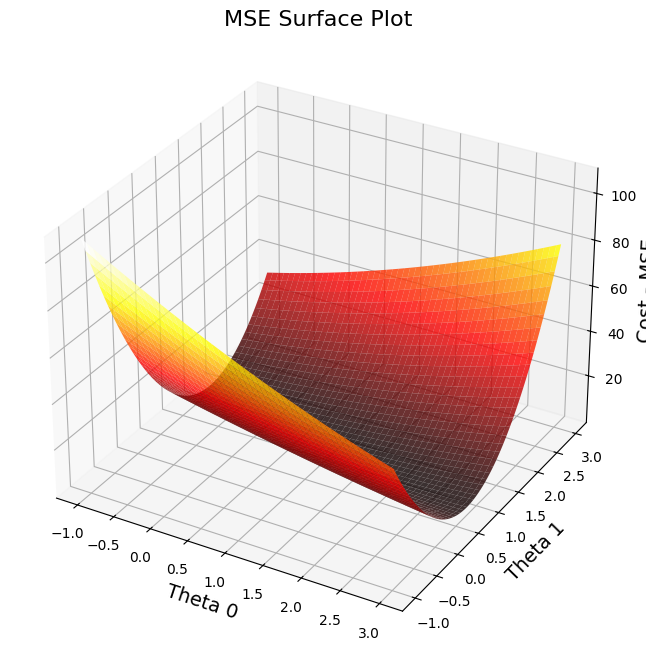

In [58]:
# Plotting MSE surface
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111, projection='3d')  # Correct way to create 3D axis

ax.set_xlabel('Theta 0', fontsize=14)
ax.set_ylabel('Theta 1', fontsize=14)
ax.set_zlabel('Cost - MSE', fontsize=14)
ax.set_title('MSE Surface Plot', fontsize=16)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=0.8)
plt.show()

In [62]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


In [63]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size  # Number of data points

    # Compute the slopes (partial derivatives)
    theta0_slope = (-2 / n) * np.sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2 / n) * np.sum((y - thetas[0] - thetas[1] * x) * x)

    # Return slopes as a NumPy array
    return np.array([theta0_slope, theta1_slope])


In [64]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


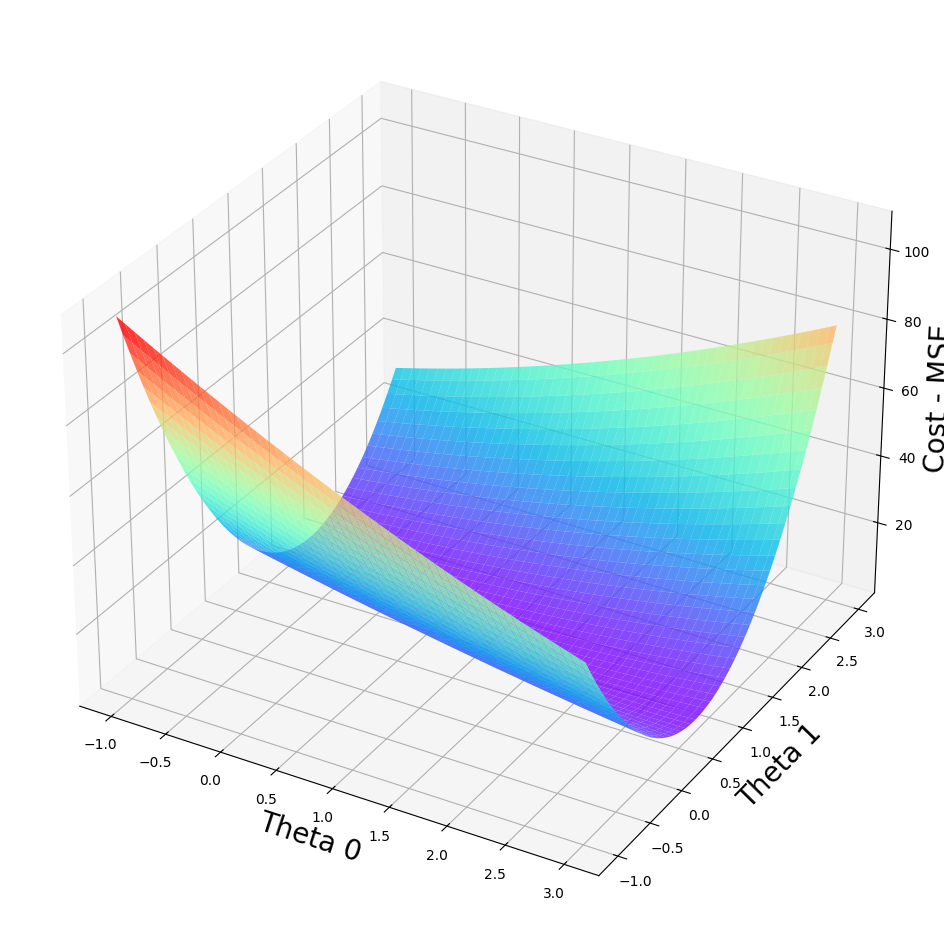

In [67]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])

# Correct way to create a 3D axis
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Example surface plot (replace with your actual data: plot_t0, plot_t1, plot_cost)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.8)

plt.show()
